<a href="https://colab.research.google.com/github/Chohyungun/Chohyungun/blob/main/2%EC%9E%A5_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. 사이킷런으로 시작하는 머신러닝**

## 1.붓꽃 품종 예측하기

In [ ]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
# 붓꽃 예측을 위한 사이킷런 필요 모듈 로딩
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터 세트를 로딩
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# 학습 데이터와 테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

# 학습 데이터 세트로 학습(Train) 수행하기
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=11)

In [ ]:
# 테스트 데이터 세트로 예측(Predict) 수행
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [ ]:
# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


### 2.사이킷런 기반 프레임워크 익히기

In [ ]:
# 사이킷런 내장 예제 데이터를 이용한 붓꽃 데이터 세트 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
# 붓꽃 데이터 세트 키 확인하기
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들: ', keys)

붓꽃 데이터 세트의 키들:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# load_irs()가 반환하는 객체 키들이 가르키는 값
print('feature_names의 type: ', type(iris_data.feature_names))
print('feature_names의 shape: ', len(iris_data.feature_names))
print('feature_names: ', iris_data.feature_names)

print('\ntarget_names의 type: ', type(iris_data.target_names))
print('target_names의 shape: ', len(iris_data.target_names))
print('target_names: ', iris_data.target_names)

print('\ndata의 type: ', type(iris_data.data))
print('data의 shape: ', iris_data.data.shape)
print('data: \n', iris_data['data'])

print('\ntarget의 type: ', type(iris_data.target))
print('target의 shape: ', iris_data.target.shape)
print('target: \n', iris_data['target'])

### 3.Model Selction 모듈 소개

train_test_split(): 학습/테스트 데이터 셋 분리 메소드 

In [ ]:
# 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측
# 학습과 예측을 동일한 데이터 세트에서 수행
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


- 위의 예측결과가 100% 정확(이상함): 이미 학습한 데이터 세트 기반으로 예측했기 때문임
- 실제 예측에서는 학습하지 않은 데이터를 기반으로 예측해야함
- 학습데이터 자체를 학습데이터와 테스트 데이터로 분할하여 예측

- train_test_split() 의 파라미터
1. test_size : 전체 데이터 세트에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인지 결정, 기본값 : 0.25
2. train_size : 전체 데이터 세트에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인지 결정, test_size를 주로 사용해서 잘 쓰는 파라미터는 아님
3. shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정, 기본값은 True, 데이터를 분산시켜 보다 효율적인 학습/테스트 데이터 세트를 만드는데 사용
4. random_state : 난수 값을 지정하면 여러번 다시 수행해도 동일한 결과가 나오게 해줌

In [ ]:
# 붓꽃 데이터 세트를 train_test_split()을 이용하여 test: 0.3, train: 0.7로 분할하여 테스트
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test,y_train, y_test= train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [ ]:
# 학습용 데이터를 기반으로 DecisionTreeClassifier를 학습하고 모델을 이용해 예측 정확도를 측정
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


In [ ]:
# KFold 교차 검증 객체 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 5개의 폴드세트를 분리하는 kFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터세트 크기: ', features.shape[0])

붓꽃 데이터세트 크기:  150


- KFold(n_splits= 5)로 객체를 생성했기 때문에 150개의 데이터세트에서 120개의 학습용 데이터, 30개의 테스트 데이터 세트를 5번 만듦
- KFold 객체는 split() 을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환 => 실제 분할된 데이터 추출은 코드로 직접 수행

In [ ]:
# split()이 어떤값을 반환하는 지 확인
# 검증 데이터 세트의 인덱스도 추출
n_iter = 0 

# KFold 객체의 split() 을 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 세트 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균검증 정확도: ', np.mean(cv_accuracy))


1 교차검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차검증 정확도 : 0.9, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차검증 정확도 : 0.8, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균검증 정확도:  0.92666


- 불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식

--> 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [ ]:
# 기존 KFold 문제점 확인을 위해 iris() 데이터 로드
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']  = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

- 레이블값이 0,1,2값 모두 50개로 동일

In [ ]:
# 기존 KFold 문제점 확인을 위한 KFold 수행
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())


##교차 검증: 1
학습 레이블 데이터 분포: 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64

##교차 검증: 2
학습 레이블 데이터 분포: 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64

##교차 검증: 3
학습 레이블 데이터 분포: 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64


- 3개의 폴드 세트로 생성된 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출됨
- 이 상태에서 학습모델로 검증데이터를 예측하면 정확도가 0이 나오게 됨(검증 예측 정확도는 0이 되면 안됨)

In [ ]:
# Stratified KFold 수행
# split 메서드에 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n## 교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())

- 학습 레이블과 검증 레이블의 데이터 값 분포가 동일하게 할당 

In [ ]:
# 붓꽃 데이터 세트에서 Stratified Kfold 를 이용한 검증

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('{0} 교차검증 정확도: {1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    cv_accuracy.append(accuracy)
    
# 교차검증별 정확도 및 평균정확도 계산
print('\n 교차검증별 정확도: ', cv_accuracy)
print('## 평균 검증 정확도: ', np.mean(cv_accuracy))

1 교차검증 정확도: 0.98, 학습데이터 크기: 100, 검증데이터 크기: 50
2 교차검증 정확도: 0.94, 학습데이터 크기: 100, 검증데이터 크기: 50
3 교차검증 정확도: 0.98, 학습데이터 크기: 100, 검증데이터 크기: 50

 교차검증별 정확도:  [0.98, 0.94, 0.98]
## 평균 검증 정확도:  0.9666666666666667


- 기존 KFold 프로세스
1. 폴드 세트 설정 
2. for 루프 반복으로 학습 및 테스트 데이터의 인덱스를 추출 
3. 반복적으로 학습과 예측을 수행하고 예측수행을 반환
- cross_val_score(): 위 프로세싱을 수행하는 간편 교차검증 API

In [ ]:
# cross_val_score()를 이용한 교차검증
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능지표는 정확도(accuracy), 교차검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, cv =3 , scoring = 'accuracy')
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


- GridSearchCV: 교차검증, 최적 하이퍼 파라미터 튜닝 동시 수행

In [ ]:
#GridSearchCV 수행
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]}

- 학습 데이터 세트를 GridSearchCV 객체의 fit 메서드에 인자로 입력

--> 학습데이터를 cv에 입력된 폴딩 수로 분할

--> param_grid에 기술된 하이퍼파라미터로 순차적으로 변경하며 학습/평가 수행

--> 개별 평가결과 : cvresults 에 기록

--> 최고 성능 파라미터 : bestparams 에 기록

--> 최고 점수 : bestscores 에 기록

In [ ]:
#GiedSerchCV의 동작 확인
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
# 최적 하이퍼 파라미터 값과 정확도 확인
print('GridSearch 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearch 최고 점수: ', grid_dtree.best_score_)

GridSearch 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearch 최고 점수:  0.975


- refit = True 이면, GridSearchCV가 이미 최적 성능을 나타내는 하이퍼파라미터로 Estimator를 학습해 bestestimator 로 저장

In [ ]:
#best_estimator를 이용하여 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측 및 성능 평가
# GridSearchCV의 refit으로 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estmator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터세트 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터세트 정확도:  0.9667


###4.데이터 전처리

- 데이터 인코딩
1. 레이블 인코딩: 카테고리 피처를 코드형 숫자로 변환

2. 원-핫 인코딩: 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지에는 0으로 표시(레이블 인코딩 문제점 해소,OneHotEncoder 클래스로 변환)

In [ ]:
# LableEncoder를 객체로 생성한 후 fit()과 transform을 호출 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


- TV는 0, 냉장고는 1, 믹서는 2, 선풍기는 3, 전자레인지는 4, 컴퓨터는 5로 변환
-이처럼 데이터가 적을 경우에는 직관적으로 알 수 있지만, 많은 경우에는 어려움

- classes_ : 변환된 인코딩 값에 대한 원본 값을 가지고 있음
- inverse_transform() : 인코딩된 값을 다시 디코딩


In [ ]:
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본 값: ', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값:  ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


- 일괄적인 숫자 값으로 변환이 되면서 몇몇 알고리즘에는 예측성능이 떨어지는 경우가 발생

In [ ]:
# 넘파이를 이용하여 원-핫 인코딩 적용하기
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 주의점
1. OneHotEncoder 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환이 되어 있어야 함
2. 입력값으로 2차원 데이터가 필요함

- get_dummies(): 판다스 메소드, 숫자형 값으로 변환 없이 바로 인코딩 가능

In [ ]:
# 판다스를 이용하여 원-핫 인코딩 적용하기
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0



- 피처 스케일링(Feature Scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업(표준화, 정규화 등)

- 표준화(Standardization) : 데이터 피처의 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환

- StandardScaler: 표준화를 쉽게 지원하기 위한 클래스로 개별 피처를 평균이 0, 분산이 1인 값으로 변환
- RBF 커널을 이용하는 서포트 벡터 머신, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현했기 때문에, 사전에 표준화를 적용하는 것은 예측 향상에 중요한 요소임

In [ ]:
# StandardScaler로 데이터 값을 변환하기

# iris 객체 생성
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


- transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이 ndarray이므로 이를 DataFrame으로 변환해 평균값과 분산 값 확인

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- 모든 컬럼 값의 평균이 0, 분산이 1에 아주 가깝게 변환되었음

- MinMaxScaler: 데이터값을 0과 1사이의 범위 값으로 변환(음수값이 있으면 -1에서 1값으로 변환)하는 메서드



In [ ]:
# MinMaxScaler 동작 확인하기
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- 모든 피처에 0에서 1사이 값으로 변환되는 스케일링 적용

## 2.사이킷런이용 타이타닉 생존자 예측

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 훈련 데이터셋 확인
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
print('\n ### 훈련 데이터셋 정보 ### \n')
print(train.info())


 ### 훈련 데이터셋 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- Age, Cabin, Embarked 컬럼에서 Null 값이 있는데 머신러닝 모델에는 Null값을 허용하지 않기 때문에 이를 어떻게 처리할지 결정해야함

In [ ]:
### Age는 평균값으로 대체
train['Age'].fillna(train['Age'].mean(), inplace = True)

### 나머지는 'N'으로 대체
train['Cabin'].fillna('N', inplace=True)
train['Embarked'].fillna('N', inplace=True)
print('데이터 Null 값 개수: ', train.isnull().sum().sum())

데이터 Null 값 개수:  0


In [ ]:
#Sex, Cabin, Embarked --> 세 가지 문자열 Feature에 대해 값과 데이터 수 확인
print('Sex 값 분포 :\n', train['Sex'].value_counts())
print('\nCabin 값 분포: \n', train['Cabin'].value_counts())
print('\nEmbarked 값 분포: \n', train['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Sex와 Embarked 값은 크게 문제가 없으나, Cabin의 경우 N이 687건으로 가장 많음
- Cabin은 첫 번째 글자가 좌석의 등급 등과 연관이 있을 수도 있으므로 첫 글자만 추출

In [ ]:
train['Cabin'] = train['Cabin'].str[:1]
print(train['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


- 성별에 따른 생존자 수를 비교

In [ ]:
train.groupby(['Sex','Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

- Survived는 예측의 대상이 되는 타겟 컬럼으로 0이면 사망, 1이면 생존
- 여자는 81/233 = 74.2% 가량 생존했고, 남자는 109/577 = 18.8% 생존

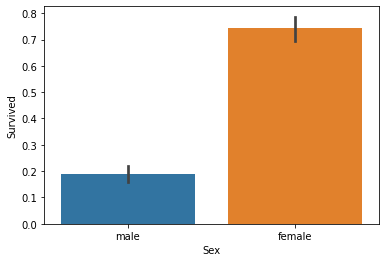

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train)

- 부자와 가난한 사람의 생존률 차이는 어떤지 살펴보기 --> Pclass+Sex

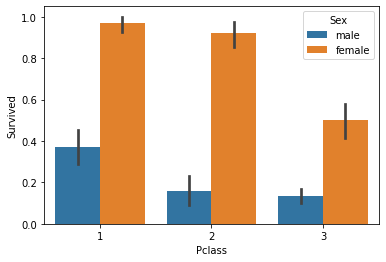

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

- 여성의 경우 1, 2등급 모두 생존률이 높고 3등급으로 가면 생존률이 많이 떨어짐 남성의 경우도 등급이 좋을 수록 생존률이 높으나, 남성 1등급의 생존률이 여성 3등급의 생존률보다 낮음

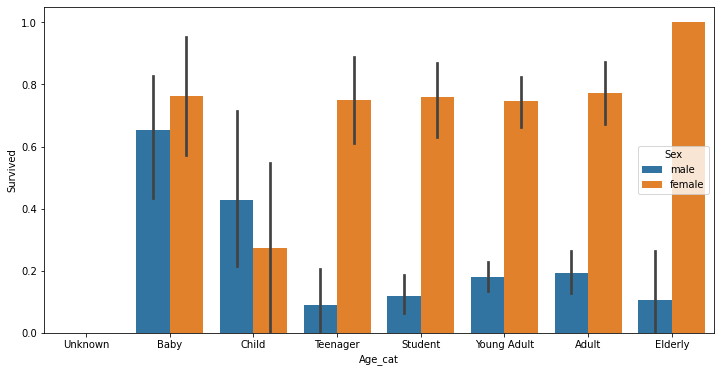

In [ ]:
# Age 값에 따른 생존 확률 구하기
# Age 값에 따라 연령층을 분류하는 함수 정의. 이후 apply lambda에 이용

def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# barplot 크게 설정
plt.figure(figsize=(12, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환 값으로 지정
# get_category(x)는 입력값으로 Age 컬럼 값을 받아서 해당되는 cat 반환
train['Age_cat'] = train['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=train, order=group_names)
train.drop('Age_cat', axis=1, inplace=True)

- 여자 Baby의 경우에는 비교적 생존률이 높고, Child의 경우 생존률이 낮음, Elderly의 경우에는 생존률이 매우 높음
- Sex, Age, Pclass 등이 생존 여부에 중요한 Feature인 것으로 보임
- 이제 남아있는 문자열 카테고리 Feature를 숫자형으로 변환 --> 사이킷런의 LabelEncoder() 이용

In [ ]:
# LabelEncoder 객체는 카테고리 값의 유형수에 따라 0 ~ (유형수-1) 까지 숫자 값으로 변환
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

train = encode_features(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3
